## PROJECT

## CASE STUDY : DECLINING RATES OF A STREAMING APP

* Data Analytics
* Numpy, pandas, scikit learn

## ** PROJECT SUMMARY ** This case study aims to find out the reason for decline in ratings of a streaming service based on various factors like Search function,device os, os version etc

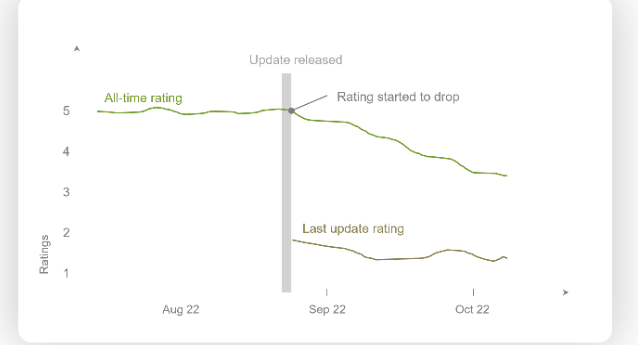

In [1]:
from IPython.display import Image
Image(filename='C:/Users/Sonal Jain/Desktop/img/app.png')

### PROBLEM STATEMENT:

BingHive is a streaming platform like Netflix, which allows its users to watch series and movies.
The OTT market is competitive and BingHive is competing against a lot of established players like Netflix, prime, Hotstar, etc. Their tech team keeps making new releases to the app and they rolled out a new update to the "Search" feature of the app.
The users rely on the "Search" feature heavily to discover what they can watch on the platform.
In mid-August, BingHive released an update after which the app's ratings across all platforms started to drop.  The rating for the last update alone fluctuated between 1 and 2.
In most of the reviews, the users complained that the "search" functionality isn't working as expected. Some users could not find what they were looking for whereas others had to scroll a lot. A good part of them reported the search button became unresponsive and sometimes showed errors.
The product manager wants you to investigate what happened and find out anything that can help product developers fix it as quickly as possible.


### AIM:
* Perform analysis to understand why users are complaining about the search button.* 
Deep dive and identify which category of users are facing problems with search since the last update.
* 
Communicate your findingso that corrective actions can be taken upon it.s.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## A Quick look at the data structure

In [3]:
activity_df=pd.read_csv("C:/Users/Sonal Jain/Desktop/users_activity_log.csv")
device_df=pd.read_csv("C:/Users/Sonal Jain/Desktop/device_details.csv")

In [4]:
activity_df.head()

,user_id,occurred_at,event_name,os,os_version,device_id
0,4436047,04-10-2022 15:18,watchlists,android,12,146
1,905476,31-08-2022 15:19,home,windows,10,511
2,5038318,10-10-2022 08:33,watchlists,windows,10,512
3,489996,09-09-2022 08:54,library,windows,10,511
4,3065600,03-09-2022 17:39,settings,windows,10,511


In [5]:
device_df.head()

,device_id,name,screen_size,os_version,ram,battery,chipset
0,408,Xiaomi Mi 10T Lite 5G,"6.67""",Android 10,6 GB RAM,4820 mAh Li-Po,Qualcomm SM7225 Snapdragon 750G 5G (8 nm)
1,229,Oppo Find X2 Neo,"6.5""",Android 10,12 GB RAM,4025 mAh Li-Po,Qualcomm SM7250 Snapdragon 765G 5G (7 nm)
2,452,Infinix Zero 5,"5.98""",Android 7.0,6 GB RAM,4350 mAh Li-Ion,Qualcomm SDM730 Snapdragon 730 (8 nm)
3,371,Xiaomi Black Shark 4S,"6.67""",Android 11,8/12 GB RAM,4500 mAh Li-Po,Qualcomm SM8250-AC Snapdragon 870 5G (7 nm)
4,59,Infinix Zero 5G,"6.78""",Android 11,8 GB RAM,5000 mAh Li-Po,Qualcomm SM8150 Snapdragon 855+ (7 nm)


In [6]:
users_df = pd.merge(activity_df,device_df, on='device_id', how='inner')
users_df.head(n=5)

,user_id,occurred_at,event_name,os,os_version_x,device_id,name,screen_size,os_version_y,ram,battery,chipset
0,4436047,04-10-2022 15:18,watchlists,android,12,146,OnePlus 10 Pro,"6.7""",Android 12,8/12 GB RAM,5000 mAh Li-Po,Qualcomm SM8450 Snapdragon 8 Gen 1 (4 nm)
1,4436047,07-10-2022 12:57,library,android,12,146,OnePlus 10 Pro,"6.7""",Android 12,8/12 GB RAM,5000 mAh Li-Po,Qualcomm SM8450 Snapdragon 8 Gen 1 (4 nm)
2,6797762,02-09-2022 08:18,library,android,12,146,OnePlus 10 Pro,"6.7""",Android 12,8/12 GB RAM,5000 mAh Li-Po,Qualcomm SM8450 Snapdragon 8 Gen 1 (4 nm)
3,4436047,04-10-2022 15:16,settings,android,12,146,OnePlus 10 Pro,"6.7""",Android 12,8/12 GB RAM,5000 mAh Li-Po,Qualcomm SM8450 Snapdragon 8 Gen 1 (4 nm)
4,5981239,30-09-2022 11:00,home,android,12,146,OnePlus 10 Pro,"6.7""",Android 12,8/12 GB RAM,5000 mAh Li-Po,Qualcomm SM8450 Snapdragon 8 Gen 1 (4 nm)


In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368714 entries, 0 to 368713
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       368714 non-null  int64 
 1   occurred_at   368714 non-null  object
 2   event_name    368714 non-null  object
 3   os            368714 non-null  object
 4   os_version_x  368714 non-null  int64 
 5   device_id     368714 non-null  int64 
 6   name          368714 non-null  object
 7   screen_size   255370 non-null  object
 8   os_version_y  368714 non-null  object
 9   ram           272888 non-null  object
 10  battery       255370 non-null  object
 11  chipset       368714 non-null  object
dtypes: int64(3), object(9)
memory usage: 33.8+ MB


## VARIABLE GUIDE

In [8]:
users_df.columns

Index(['user_id', 'occurred_at', 'event_name', 'os', 'os_version_x',
       'device_id', 'name', 'screen_size', 'os_version_y', 'ram', 'battery',
       'chipset'],
      dtype='object')

1. user_id: unique used id for each individual user
2. occurred_at: time at which an event ocurred (ex: logging in, going to home page, using the search button)
3. event_name: name of the event occured
              * query_result_0: Error
              * autocomplete_engine: user selecting the autocomplete search option
4. os_version_x: os version of device used
5. os: os of decive used
6. device_id: unique device id for each device
7. name: name of device
8. screen_size: screen size of device
10. ram: ram storage of device
11. battery: battery of device
12. chipset: chipset used in the device

## DATA WRANGLING

In [9]:
users_df["occurred_at"]=pd.to_datetime(users_df["occurred_at"],format="%d-%m-%Y %H:%M")
users_df["year"]=users_df["occurred_at"].dt.year
users_df["month"]=users_df["occurred_at"].dt.month
users_df["date"]=users_df["occurred_at"].dt.day
users_df["hour"]=users_df["occurred_at"].dt.hour
users_df["minutes"]=users_df["occurred_at"].dt.minute
users_df.head(n=1)

,user_id,occurred_at,event_name,os,os_version_x,device_id,name,screen_size,os_version_y,ram,battery,chipset,year,month,date,hour,minutes
0,4436047,2022-10-04 15:18:00,watchlists,android,12,146,OnePlus 10 Pro,"6.7""",Android 12,8/12 GB RAM,5000 mAh Li-Po,Qualcomm SM8450 Snapdragon 8 Gen 1 (4 nm),2022,10,4,15,18


## ANALYSING THE DATA

In [10]:
## sorting the dataframe based on it's user_id

In [11]:
users_df = users_df.sort_values(by='user_id')
users_df.head(n=5)

,user_id,occurred_at,event_name,os,os_version_x,device_id,name,screen_size,os_version_y,ram,battery,chipset,year,month,date,hour,minutes
342301,9750,2022-09-05 14:13:00,home,android,11,380,Xiaomi Redmi Note 11 4G,"6.5""",Android 11,4/6 GB RAM,5000 mAh Li-Po,Mediatek Helio G88 (12nm),2022,9,5,14,13
342241,9750,2022-09-18 13:57:00,library,android,11,380,Xiaomi Redmi Note 11 4G,"6.5""",Android 11,4/6 GB RAM,5000 mAh Li-Po,Mediatek Helio G88 (12nm),2022,9,18,13,57
342243,9750,2022-09-24 08:51:00,run_query,android,11,380,Xiaomi Redmi Note 11 4G,"6.5""",Android 11,4/6 GB RAM,5000 mAh Li-Po,Mediatek Helio G88 (12nm),2022,9,24,8,51
342244,9750,2022-08-30 10:57:00,home,android,11,380,Xiaomi Redmi Note 11 4G,"6.5""",Android 11,4/6 GB RAM,5000 mAh Li-Po,Mediatek Helio G88 (12nm),2022,8,30,10,57
342245,9750,2022-09-18 13:57:00,watchlists,android,11,380,Xiaomi Redmi Note 11 4G,"6.5""",Android 11,4/6 GB RAM,5000 mAh Li-Po,Mediatek Helio G88 (12nm),2022,9,18,13,57


### Are the users searching actively?

Here, we analyize the amount of time someone has searched something i.e the run_query command

In [12]:
run_query_df = users_df[users_df['event_name'] == 'run_query']
query_counts = run_query_df.groupby('user_id').size().reset_index(name='run_query_count')
print(query_counts)


       user_id  run_query_count
0         9750               11
1        11681               21
2        16284                3
3        17563               16
4        21504               36
...        ...              ...
3775  10005212               14
3776  10006726                9
3777  10010781               80
3778  10012030               19
3779  10013277                1

[3780 rows x 2 columns]


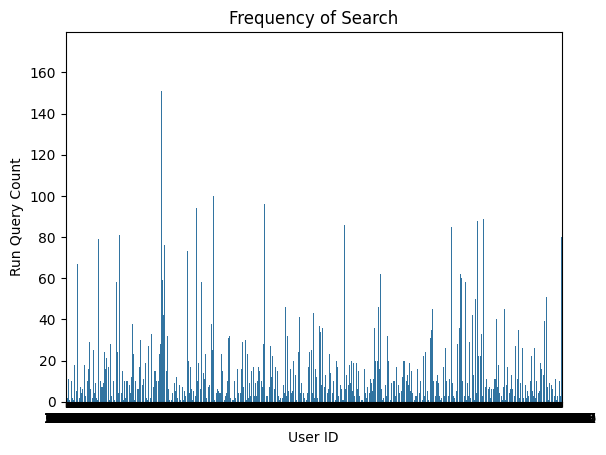

In [13]:
sns.barplot(x='user_id', y='run_query_count', data=query_counts)
plt.title('Frequency of Search')
plt.xlabel('User ID')
plt.ylabel('Run Query Count')
plt.show()

Thus the frequency varies a lot per user with most being between 140 to 160 and least ranging from 0-20.
If users search a lot, it is likely that they find search useful (an exception to this would be if users search repeatedly within a short timeframe, it is likely they are refining their terms because they are unable to find what they wanted initially)

### Nth result from top

In [14]:
event_counts = users_df['event_name'].value_counts().reset_index(name='count')
print(event_counts)

             event_name  count
0                  home  94065
1            watchlists  59248
2               library  55936
3             run_query  54541
4                 login  38610
5              settings  33105
6   autocomplete_engine  17820
7        query_result_0   5617
8        query_result_2   1499
9        query_result_1   1413
10       query_result_4   1264
11       query_result_3   1134
12       query_result_5    968
13       query_result_6    805
14       query_result_9    784
15       query_result_7    709
16       query_result_8    690
17      query_result_10    506


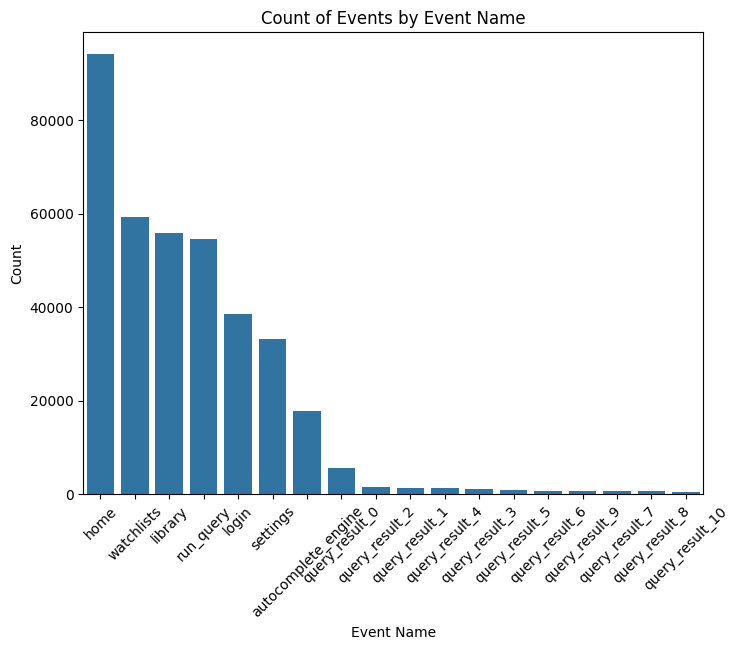

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='event_name', y='count', data=event_counts)
plt.title('Count of Events by Event Name')
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
print("The search bar has been used",54541,"no of times")
print(f"First search result was selected {1413} no of times")
print(f"Second search result was selected {1499} no of times")
print(f"Third search result was selected {1134} no of times")
print(f"Fourth search result was selected {1264} no of times")
print(f"Fifth search result was selected {968} no of times")
print(f"sixth search result was selected {805} no of times")
print(f"Seventh search result was selected {784} no of times")
print(f"Eighth search result was selected {709} no of times")
print(f"Ninth search result was selected {690} no of times")
print(f"Tenth search result was selected {506} no of times")

The search bar has been used 54541 no of times
First search result was selected 1413 no of times
Second search result was selected 1499 no of times
Third search result was selected 1134 no of times
Fourth search result was selected 1264 no of times
Fifth search result was selected 968 no of times
sixth search result was selected 805 no of times
Seventh search result was selected 784 no of times
Eighth search result was selected 709 no of times
Ninth search result was selected 690 no of times
Tenth search result was selected 506 no of times


* Thus there are small but a 'non-negligible' amount of people that select the 5th,6th,7th....10th result from the top.
* This could indicate that the search results from (1-4) are not good enough
* This could also indicate that the search results are not ordered properly.

### Errors in Search bar

In [17]:
query_result_0_count = (users_df['event_name'] == 'query_result_0').sum()
print(f"Count of 'run_query_0': {query_result_0_count}")

Count of 'run_query_0': 5617


The Search bar has shown an error 5617 times

In [18]:
query_counts = users_df[users_df['event_name'] == 'query_result_0'].groupby('os').size().reset_index(name='query_result_0_count')
print(query_counts)

        os  query_result_0_count
0  android                  5617


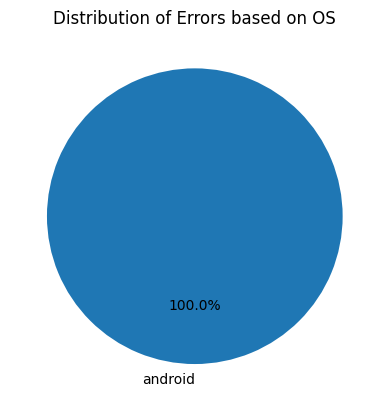

In [19]:
plt.pie(query_counts['query_result_0_count'], labels=query_counts['os'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Errors based on OS')
plt.show()

* Suprisingly we see from the data that all the errors are caused in android phones

In [20]:
## Now we check other factors of the android os that might be causing errors

In [21]:
run_query_0_count_by_attributes = users_df[users_df['event_name'] == 'query_result_0'].groupby(['os_version_x', 'ram', 'chipset', 'battery']).size().reset_index(name='run_query_0_count')

print(run_query_0_count_by_attributes)

    os_version_x          ram                                chipset  \
0             12   2/3 GB RAM  Mediatek MT6893 Dimensity 1200 (6 nm)   
1             12     4 GB RAM  Mediatek MT6833P Dimensity 810 (6 nm)   
2             12   4/6 GB RAM   Mediatek MT6833 Dimensity 700 (7 nm)   
3             12   4/6 GB RAM  Mediatek MT6833P Dimensity 810 (6 nm)   
4             12   4/8 GB RAM  Mediatek MT6833P Dimensity 810 (6 nm)   
5             12     6 GB RAM   Mediatek MT6833 Dimensity 700 (7 nm)   
6             12  6-12 GB RAM          Mediatek Dimensity 930 (6 nm)   
7             12   6/8 GB RAM         Mediatek Dimensity 1300 (6 nm)   
8             12   6/8 GB RAM         Mediatek Dimensity 8100 (5 nm)   
9             12   6/8 GB RAM          Mediatek Dimensity 920 (6 nm)   
10            12   6/8 GB RAM          Mediatek Dimensity 920 (6 nm)   
11            12   6/8 GB RAM  Mediatek MT6833P Dimensity 810 (6 nm)   
12            12   6/8 GB RAM   Mediatek MT6877 Dimensity 900 (6

In [22]:
run_query_0_count_by_attributes.describe()

,os_version_x,run_query_0_count
count,22.0,22.000000
mean,12.0,255.318182
std,0.0,100.410769
min,12.0,143.000000
25%,12.0,206.750000
50%,12.0,217.000000
75%,12.0,264.250000
max,12.0,475.000000


<Figure size 800x600 with 0 Axes>

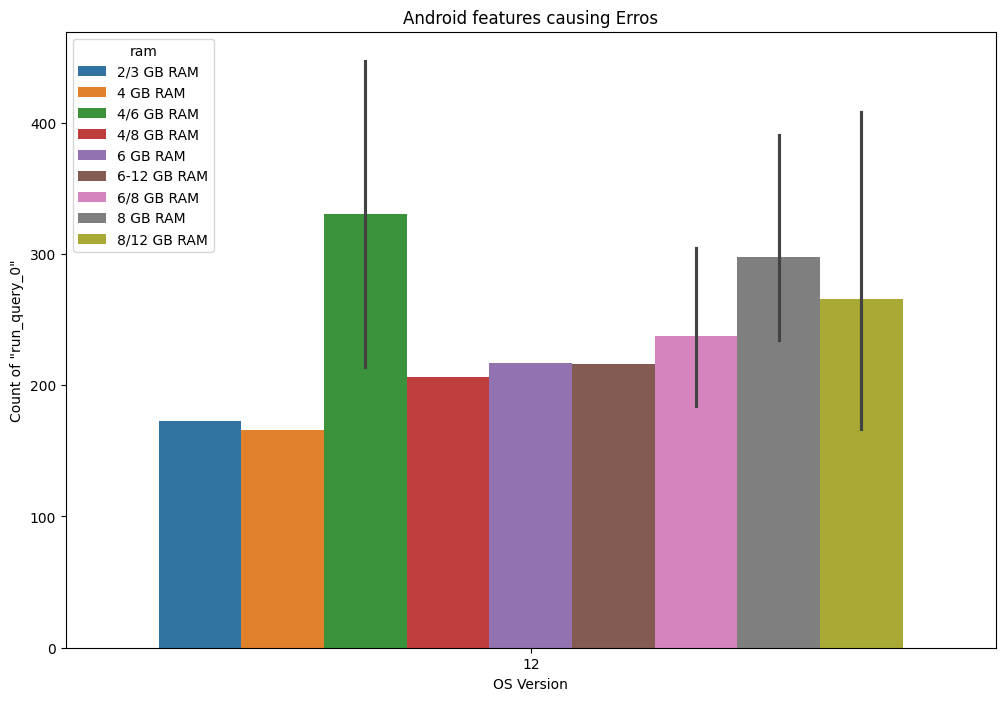

In [23]:
# Plotting
run_query_0_df = users_df[users_df['event_name'] == 'query_result_0']
plt.figure(figsize=(8,6))  

# Group by multiple columns and count occurrences
grouped_df = run_query_0_df.groupby(['os_version_x', 'ram', 'chipset', 'battery']).size().reset_index(name='query_result_0_count')

# Plotting a grouped bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='os_version_x', y='query_result_0_count', hue='ram', data=grouped_df)
plt.title('Android features causing Erros')
plt.xlabel('OS Version')
plt.ylabel('Count of "run_query_0"')
plt.show()

In [24]:
mode_os_version_x = run_query_0_count_by_attributes['os_version_x'].mode()[0]
mode_ram = run_query_0_count_by_attributes['ram'].mode()[0]
mode_chipset = run_query_0_count_by_attributes['chipset'].mode()[0]
mode_battery = run_query_0_count_by_attributes['battery'].mode()[0]

# Display the modes
print(f"Mode of 'os_version_x': {mode_os_version_x}")
print(f"Mode of 'ram': {mode_ram}")
print(f"Mode of 'chipset': {mode_chipset}")
print(f"Mode of 'battery': {mode_battery}")

Mode of 'os_version_x': 12
Mode of 'ram': 6/8 GB RAM
Mode of 'chipset': Mediatek MT6833P Dimensity 810 (6 nm)
Mode of 'battery': 5000 mAh Li-Po


* Thus,we see that 100% errors occur in OS Version 12.
* Most of these errors occur in devices with 6/8 GB ram.
* The chipset with heighest error is Mediatek MT6833P Dimensity 810 (6 nm)
* And the device battery with most error is 5000 mAh Li-Po


### Automated clickthrough rate

In [25]:
acr_count=(users_df['event_name']=='autocomplete_engine').sum()
print(f"No of times autocomplete choice was selected {acr_count}")

run_query_count=(users_df['event_name']=='run_query').sum()
print(f"Total no of times search bar was used: {run_query_count}")

print(f"The users chose the autocomplete results {(acr_count/run_query_count)*100}% of the time")

No of times autocomplete choice was selected 17820
Total no of times search bar was used: 54541
The users chose the autocomplete results 32.67266826790854% of the time


In [26]:
acr=users_df[users_df['event_name']=='autocomplete_engine']

In [27]:
## autocomplete result group by os of device
acr_os_count=acr.groupby('os').size()
acr_os_count

os
android    9024
ios        3665
mac         577
windows    4554
dtype: int64

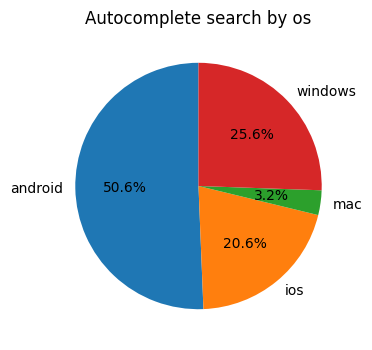

In [28]:
plt.figure(figsize=(4,4))
plt.pie(acr_os_count, labels=acr_os_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Autocomplete search by os')
plt.show()

C:\Users\Sonal Jain\AppData\Local\Temp\ipykernel_5356\2760432253.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')


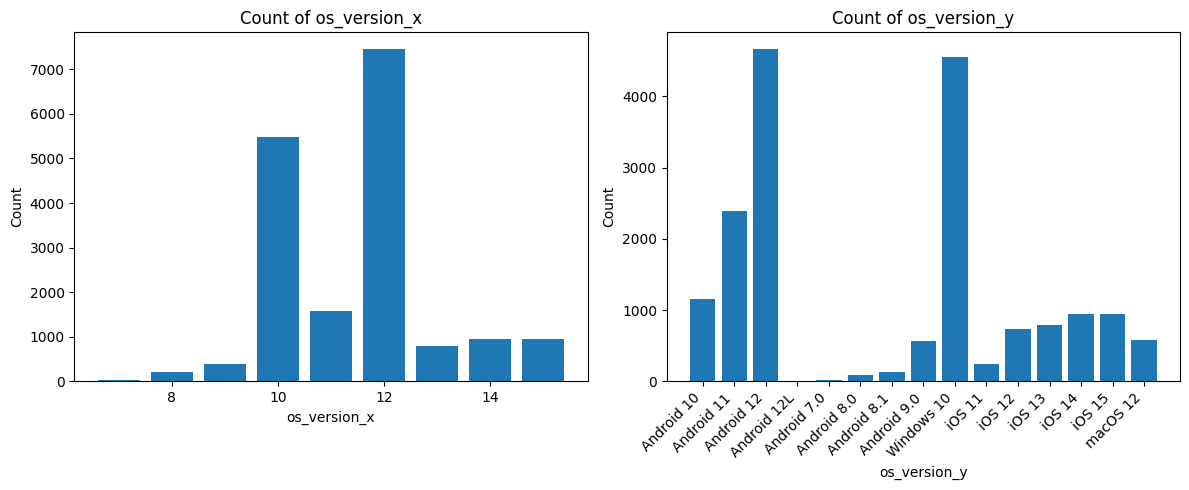

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
acr_osversionx_count=acr.groupby('os_version_x').size()
acr_osversiony_count=acr.groupby('os_version_y').size()
# Plotting the first subplot (os_version_x)
axs[0].bar(acr_osversionx_count.index, acr_osversionx_count)
axs[0].set_title('Count of os_version_x')
axs[0].set_xlabel('os_version_x')
axs[0].set_ylabel('Count')

# Plotting the second subplot (os_version_y)
axs[1].bar(acr_osversiony_count.index, acr_osversiony_count)
axs[1].set_title('Count of os_version_y')
axs[1].set_xlabel('os_version_y')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


* Android users account for 50% of the autocomplete searches
* Users with Andriod version 12 and Windows 10 seem to prefer the autocomplete engine the most
* Autcomplete engine is most popular with OS version 10 and 12

## CONCLUSIONS :

* The search button is being used actively, with most searches done by one user ranging upto 140 to 160 searches and the least ranging from 0-20.
* There are small but a 'non-negligible' amount of people that select the 5th,6th,7th.... ane even the 10th result from the top; indicating that the users are not satisfied with the top results and results need to be ordered properly.
* A 100% of search engine errors occur in Android phones
* OS Version 12 accounts for 50%+ errors in the search engine.
* Most of these errors occur in devices with 6/8 GB ram.
* The chipset with heighest error is Mediatek MT6833P Dimensity 810 (6 nm)
* And the device battery with most error is 5000 mAh Li-Po
* Android users account for 50% of the autocomplete searches
* Users with Andriod version 12 and Windows 10 seem to prefer the autocomplete engine the most
